In [1]:
import numpy as np
import nilearn.plotting as nplt
import nibabel as nib
import matplotlib.pyplot as plt
import os.path as op
from  nilearn.datasets import fetch_surf_fsaverage
from os import listdir

bids_folder = '/Volumes/mrenkeED/data/ds-dnumrisk'
bids_folder = '/mnt_03/ds-dnumrisk' 
grad_folder = 'derivatives/gradients'

subList = [f[4:6] for f in listdir(op.join(bids_folder, grad_folder)) if f[0:4] == 'sub-' and len(f)==6]
#subList_npFiles = [f for f in listdir(op.join(bids_folder, grad_folder)) if f[0:4] == 'sub-'] #  and len(f)==45


In [72]:
sub='0'
n_comp = 10
fn = op.join(bids_folder,grad_folder,f'sub-{sub}',f'sub-{sub}_gradients_N-{n_comp}.npy')

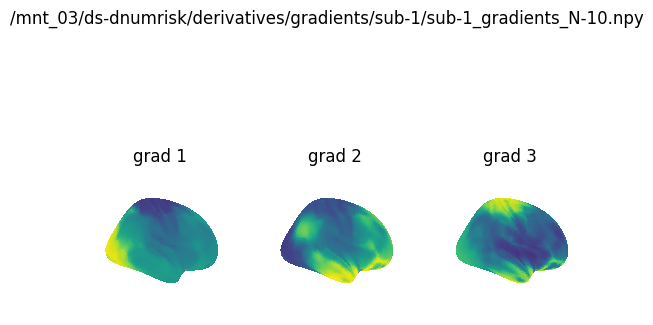

In [55]:
from utils import plot_GM12_from_sum_npfile_old

plot_GM12_from_sum_npfile_old(file=fn)

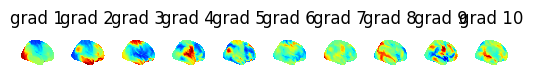

In [56]:
from utils import plot_GM12_from_sum_npfile

plot_GM12_from_sum_npfile(n_comp=10,file=fn,cmap='jet')

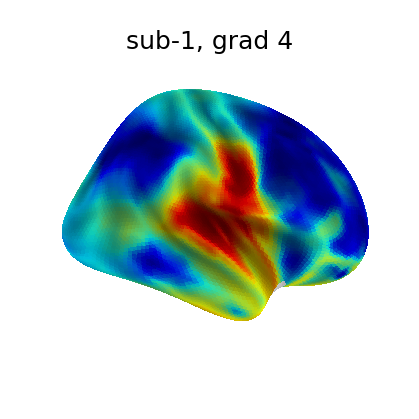

In [57]:
from  nilearn.datasets import fetch_surf_fsaverage

fsaverage = fetch_surf_fsaverage() # default 5

i = 4
side_view = 'medial'
cmap = 'jet'

grad = np.load(fn)
gm = np.split(grad[i-1],2) # for i, hemi in enumerate(['L', 'R']): --> left first
gm_r = gm[1]

nplt.plot_surf(surf_mesh= fsaverage.infl_right, surf_map= gm_r, # infl_right # pial_right
            view= side_view,cmap=cmap, colorbar=False, title=f'sub-{sub}, grad {i}',
            bg_map=fsaverage.sulc_right, bg_on_data=True,darkness=0.7) #

plt.show()

Text(0.5, 0.98, 'Group 1, \n Average Magnitude Comparison task gradients')

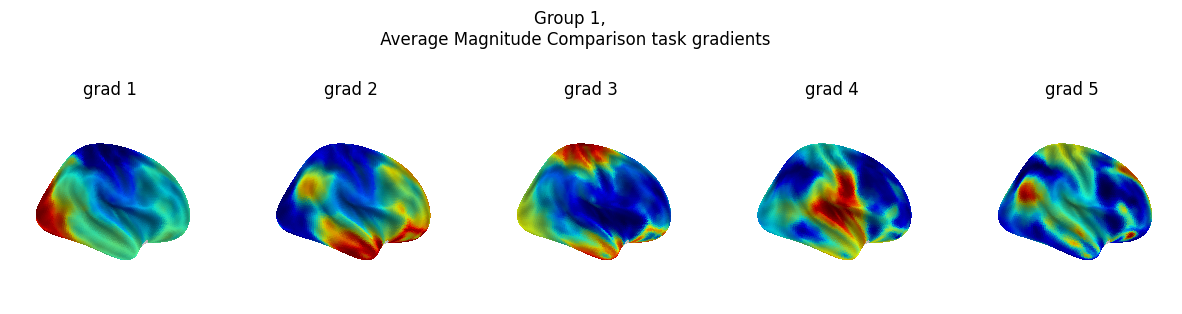

In [58]:
n_comp = 5
figure, axes = plt.subplots(nrows=1, ncols=n_comp,figsize = (15,4), subplot_kw=dict(projection='3d'))

grad = np.load(fn)

for i in range(0,n_comp):
    gm = np.split(grad[i],2) # for i, hemi in enumerate(['L', 'R']): --> left first
    gm_r = gm[1]

    nplt.plot_surf(surf_mesh= fsaverage.infl_right, surf_map= gm_r, # infl_right # pial_right
                view= side_view,cmap=cmap, colorbar=False,  # sub-{sub}, title=f'grad {i+1}',
                bg_map=fsaverage.sulc_right, bg_on_data=True,darkness=0.7 ,axes=axes[i]) #
    axes[i].set(title=f'grad {i+1}')
figure.suptitle(f'Group {sub}, \n Average Magnitude Comparison task gradients')



/tmp/ipykernel_1597029/4174383613.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(op.join(bids_folder,'plots_and_ims','avMagCompTask_gradients-N10.pdf'),bbox='tight')


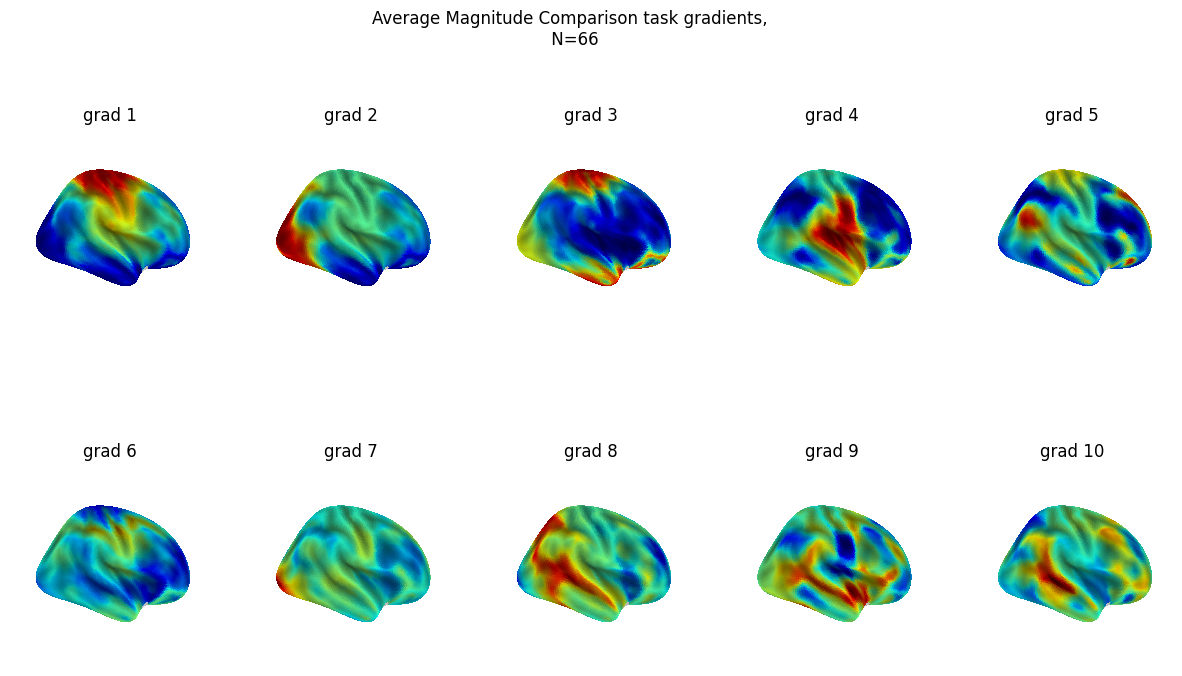

In [49]:
n_comp = 10
figure, axes = plt.subplots(nrows=2, ncols=int(n_comp/2),figsize = (15,8), subplot_kw=dict(projection='3d'))

grad = np.load(fn)

for i in range(0,n_comp):
    n_grad= i+1
    i_y = i if i < 5 else (i-5)
    i_x = 0 if i < 5 else 1
    gm = np.split(grad[i],2) # for i, hemi in enumerate(['L', 'R']): --> left first
    gm_r = gm[1]
    nplt.plot_surf(surf_mesh= fsaverage.infl_right, surf_map= gm_r, # infl_right # pial_right
                view= side_view,cmap=cmap, colorbar=False,  # sub-{sub}, title=f'grad {i+1}',
                bg_map=fsaverage.sulc_right, bg_on_data=True,darkness=0.7 ,axes=axes[i_x,i_y]) #
    axes[i_x,i_y].set(title=f'grad {n_grad}')

figure.suptitle('Average Magnitude Comparison task gradients, \n N=66')
plt.savefig(op.join(bids_folder,'plots_and_ims','avMagCompTask_gradients-N10.pdf'),bbox='tight')


## Eigenvalues - lamdas ! 

variance explained ?!



In [73]:
n_comp=10
fn_lambdas = op.join(bids_folder,grad_folder,f'sub-{sub}',f'sub-{sub}_lambdas_N-{n_comp}.npy')
lambdas = np.load(fn_lambdas)
lambdas


array([10.65505994,  9.09335413,  4.86270792,  3.85546393,  2.53259465,
        2.05206166,  1.64467689,  1.50997441,  1.31153224,  1.15777083])

Text(0.5, 1.0, 'Group 0, \n Component Lambdas')

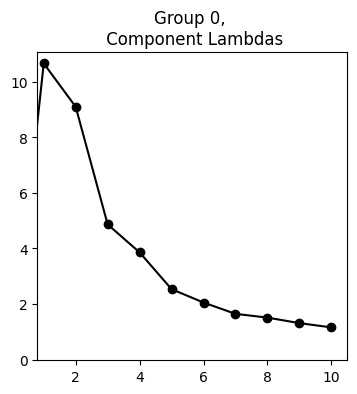

In [74]:
fig, (ax) = plt.subplots(1,1, figsize=(4,4), facecolor='white')

vals = lambdas #/ np.sum(lam)
vals = np.hstack((0,vals))
#ax.semilogx(vals, marker='o', mfc='k', mec='k', linestyle='-', color='k')
ax.plot(vals, marker='o', mfc='k', mec='k', linestyle='-', color='k')
ax.set_ylim([-0.025,np.max(vals)+0.4])
ax.set_xlim(xmin=0.8)
ax.set_title(f'Group {sub}, \n Component Lambdas')

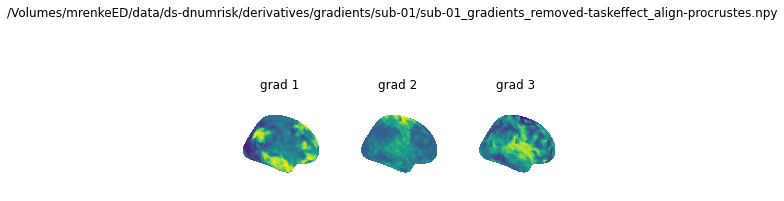

In [5]:
fn = '/Volumes/mrenkeED/data/ds-dnumrisk/derivatives/gradients/sub-01/sub-01_gradients_removed-taskeffect_align-procrustes.npy'
plot_GM12_from_sum_npfile(file=fn)

In [4]:
# grad 3 in .gii format missing, so we need to convert it from .npy
specification = '_reordMaskFlip'

for sub in subList:
    ses=1
    target_dir = op.join(bids_folder, 'derivatives', 'gradients', f'sub-{sub}', f'ses-{ses}')

    for n_grad in [3]:
        grad = np.load(op.join(target_dir, f'grad{n_grad}{specification}.npy'))
        grad = np.split(grad,2) # for i, hemi in enumerate(['L', 'R']): --> left first

        for h, hemi in enumerate(['L', 'R']):    

            gii_im_datar = nib.gifti.gifti.GiftiDataArray(data=grad[h])
            gii_im = nib.gifti.gifti.GiftiImage(darrays= [gii_im_datar])

            out_file = op.join(target_dir, f'sub-{sub}_ses-{ses}_task-risk_space-fsaverage5_hemi-{hemi}_grad{n_grad}{specification}.surf.gii')
            gii_im.to_filename(out_file) # https://nipy.org/nibabel/reference/nibabel.spatialimages.html



In [5]:
# plot all 3 gradiets for all subjects
from utils_02 import get_GMmargulies_cmap

plot_folder_name = '/Users/mrenke/data/ds-dnumrisk/plots_and_ims' #op.join(bids_folder, 'derivatives', 'gradients', 'plots')
fsaverage = fetch_surf_fsaverage() # default is fsav5
cmap = get_GMmargulies_cmap()

hemi = 'R'

side_view = 'medial' if hemi == 'R' else 'lateral'


for sub in subList:
    figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5),subplot_kw=dict(projection='3d'))
    grad_n = 1
    gm = nib.load(op.join(bids_folder,grad_folder,f'sub-{sub}','ses-1',f'sub-{sub}_ses-1_task-risk_space-fsaverage5_hemi-{hemi}_grad{grad_n}{specification}.surf.gii')).agg_data()

    nplt.plot_surf(surf_mesh= fsaverage.infl_right, surf_map= gm, # infl_right # pial_right
                view= side_view,cmap=cmap, colorbar=False, title=f'sub-{sub},{specification}',
                bg_map=fsaverage.sulc_right, bg_on_data=True,darkness=0.5,axes=axes[0])
    grad_n = 2
    gm = nib.load(op.join(bids_folder,grad_folder,f'sub-{sub}','ses-1',f'sub-{sub}_ses-1_task-risk_space-fsaverage5_hemi-{hemi}_grad{grad_n}{specification}.surf.gii')).agg_data()
    nplt.plot_surf(surf_mesh= fsaverage.infl_right, surf_map= gm, # infl_right # pial_right
                view= side_view,cmap=cmap, colorbar=False, title=f'sub-{sub}',
                bg_map=fsaverage.sulc_right, bg_on_data=True,darkness=0.5,axes=axes[1])
    grad_n = 3
    gm = nib.load(op.join(bids_folder,grad_folder,f'sub-{sub}','ses-1',f'sub-{sub}_ses-1_task-risk_space-fsaverage5_hemi-{hemi}_grad{grad_n}{specification}.surf.gii')).agg_data()
    nplt.plot_surf(surf_mesh= fsaverage.infl_right, surf_map= gm, # infl_right # pial_right
                view= side_view,cmap=cmap, colorbar=False, title=f'sub-{sub}',
                bg_map=fsaverage.sulc_right, bg_on_data=True,darkness=0.5,axes=axes[2])

    plt.savefig(op.join(plot_folder_name, f'sub-{sub}_grad123{specification}.png'),dpi=300)
    plt.close()